In [1]:
import sys 
import numpy as np 
sys.path.append('/home/ak/Documents/Research/QFPaper/Code')
import hmm 
import pandas as pd
import plotly
import plotly.plotly as py
import seaborn as sns
from hmm import hmm_calibration
from observation_models import *
import matplotlib.pyplot as plt 
%matplotlib inline 

prng = np.random.RandomState(10)
n_components = 3
startprob = prng.rand(n_components)
startprob = startprob / startprob.sum()
transmat = prng.rand(n_components, n_components) #random starting point
transmat /= np.tile(transmat.sum(axis=1)[:, np.newaxis], (1, n_components))#normalising so all entries sum up to 1

In [2]:
import os
#os.getcwd()
os.chdir('/home/ak/Documents/Research/QFPaper/Code')

In [3]:
sigmas = [ .3, 2.5, 1][0:n_components]
lambdas = [0.5, 1, 0.8][0:n_components]
weights = [0.1, 0.5, 0.4][0:n_components]
sample_size = 100


In [4]:

#generate state and observation data from the \"right\" distribution\n",
states = hmm_calibration.sample_states(startprob, transmat, prng, sample_size=sample_size)
taus, price_changes = ExpGauss.sample_data(states, lambdas, sigmas, weights,  rng=prng)
price_changes_sq = price_changes**2
data_set = pd.DataFrame()
data_set['tau'] = taus
data_set['price_change'] = price_changes
#define the calibrator and model 
obs_model = ExpGauss(n_components)
obs_model.set_up_initial_params(data_set) 
the_hmm = hmm_calibration(obs_model, n_components, max_iter=50) 

priors = None 
update_tag = 'tpsql'

(array([  3.,   0.,   5.,  62.,  15.,   6.,   6.,   0.,   1.,   2.]),
 array([-3.9663794 , -2.95341019, -1.94044098, -0.92747177,  0.08549744,
         1.09846665,  2.11143586,  3.12440507,  4.13737428,  5.15034349,
         6.16331271]),
 <a list of 10 Patch objects>)

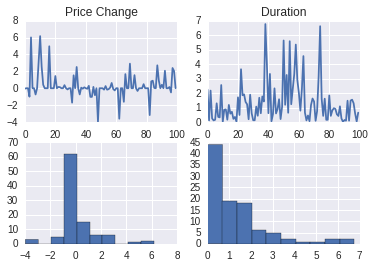

In [5]:
fig, axs = plt.subplots(2,2)
axs[0,1].set_title('Duration')
axs[0,1].plot(data_set['tau'])
axs[0,0].set_title('Price Change')
axs[0,0].plot(data_set['price_change'])
axs[1,1].hist(data_set['tau'])
axs[1,0].hist(data_set['price_change'])

#data_set['price_change'].plot.axs[1,1]
#axs[0]
#axs[1].set_title('Price Change')




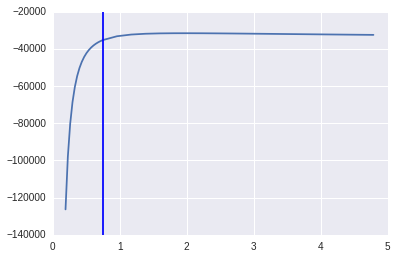

In [6]:


result = the_hmm.run_hmm(data_set, update_tag=update_tag, initialise_method_tag='uniform', rng=prng)
var_to_plot = 'lambdas_'
no_state = 0

for step_object in result['step_calibrations']: 
        #this is the variable that the M-step calculated at tjhe step-th step 
        theoretical_solution = getattr(step_object.obs_model_, var_to_plot)[no_state]
        #and these should be the optimal observation likelihood and complete data likelihood
        optimal_obs_ll = step_object.obs_model_.score(data_set)
        complete_data_ll_optimal = step_object.complete_data_log_likelihood(optimal_obs_ll)
        
        # now lets vary the "var_to_plot[no_state]" and make sure we indeed hit a maxima
        range1 = np.arange(0.05, theoretical_solution, (theoretical_solution-0.05)/20.)
        range2 = np.arange(theoretical_solution, 5., (5. - theoretical_solution)/20)
        variable_range = np.concatenate((range1, range2))

        values_range = []
        for var in variable_range:
            step_object.obs_model_.sigmas_[no_state] = var
            obs_ll = step_object.obs_model_.score(data_set)
            values_range.append(step_object.complete_data_log_likelihood(obs_ll))

plt.plot(variable_range, values_range)
plt.axvline(x=theoretical_solution) 
plt.show() 



In [7]:
test1 =values_range


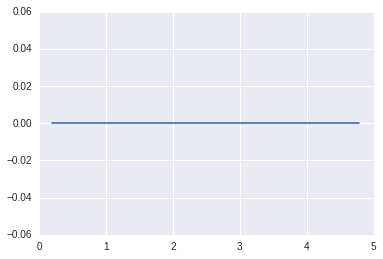

In [8]:
plt.plot(variable_range, np.array(values_range)-np.array(test1))

In [ ]:
#$$c = \sqrt{a^2 + b^2}$$

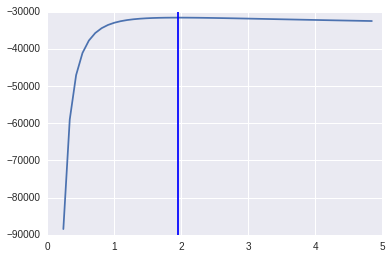

In [9]:
result = the_hmm.run_hmm(data_set, update_tag=update_tag, initialise_method_tag='uniform', rng=prng)
var_to_plot = 'sigmas_'
no_state = 1

for step_object in result['step_calibrations']: 
        #this is the variable that the M-step calculated at tjhe step-th step 
        theoretical_solution = getattr(step_object.obs_model_, var_to_plot)[no_state]
        #and these should be the optimal observation likelihood and complete data likelihood
        optimal_obs_ll = step_object.obs_model_.score(data_set)
        complete_data_ll_optimal = step_object.complete_data_log_likelihood(optimal_obs_ll)
        
        # now lets vary the "var_to_plot[no_state]" and make sure we indeed hit a maxima
        range1 = np.arange(0.05, theoretical_solution, (theoretical_solution-0.05)/20.)
        range2 = np.arange(theoretical_solution, 5., (5. - theoretical_solution)/20)
        variable_range = np.concatenate((range1, range2))

        values_range = []
        for var in variable_range:
            step_object.obs_model_.sigmas_[no_state] = var
            obs_ll = step_object.obs_model_.score(data_set)
            values_range.append(step_object.complete_data_log_likelihood(obs_ll))

plt.plot(variable_range, values_range)
plt.axvline(x=theoretical_solution) 
plt.show() 




In [7]:
lambdas_1 =values_range

In [8]:
lambdas_1

[-inf,
 -inf,
 -inf,
 -inf,
 -126336.26583824091,
 -98002.506039295055,
 -80377.229350951297,
 -68692.857526108171,
 -60565.376167218368,
 -54695.545200613124,
 -50326.516610981234,
 -46993.312596813244,
 -44397.570343592852,
 -42340.773448322157,
 -40686.724366671719,
 -39339.490745075112,
 -38229.94274890922,
 -37307.26016320107,
 -36533.418694649445,
 -35879.518773264026,
 -35323.285675510167,
 -33248.542717766832,
 -32335.607335095145,
 -31906.996587241825,
 -31709.589757875194,
 -31632.793465410603,
 -31622.754899375854,
 -31651.095810660256,
 -31701.947612201431,
 -31766.025282940729,
 -31837.70406088953,
 -31913.486297718002,
 -31991.155983349141,
 -32069.292593564445,
 -32146.981533886792,
 -32223.636442276271,
 -32298.88731568482,
 -32372.508517754308,
 -32444.371572570039,
 -32514.413710619319]